In [27]:
bins = 30
# Get the data
precipitation_data = np.load(file_name)
# Remove NAN values
precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
# The frequency of occurence of each value within each bin, normalised to form a PDF
# e.g. freqs is the counts of obs in each bin divided by the total no. of obs, 
    # scaled to ensure the area under the histogram equals 1.
# bin_edges represent the edges of the bins as specified by the bins argument.    
freqs, bin_edges = np.histogram(precipitation_data, bins=bins, density=True)
print(bin_edges)
# The actual counts of obs falling within each bin. Unlike with density=True, these counts are not 
# normalized to form a pdf. Instead, they represent the raw frequencies of occurrence of values within each bin.
freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
print(bin_edges)
# 
#n_bins = str(len(bin_edges))
# Find the centre point of each bin for plotting
bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    

[  0.          3.6788402   7.3576803  11.03652    14.715361   18.394201
  22.07304    25.75188    29.430721   33.109562   36.788403   40.467243
  44.14608    47.82492    51.50376    55.182602   58.861443   62.540283
  66.219124   69.897964   73.576805   77.255646   80.93449    84.61332
  88.29216    91.971      95.64984    99.32868   103.00752   106.68636
 110.365204 ]
[  0.          3.6788402   7.3576803  11.03652    14.715361   18.394201
  22.07304    25.75188    29.430721   33.109562   36.788403   40.467243
  44.14608    47.82492    51.50376    55.182602   58.861443   62.540283
  66.219124   69.897964   73.576805   77.255646   80.93449    84.61332
  88.29216    91.971      95.64984    99.32868   103.00752   106.68636
 110.365204 ]


In [14]:
import numpy as np
import matplotlib.pyplot as plt


# Function to calculate PDF from a single file
def calculate_pdf(file_name, bins=50):
    # Get the data
    precipitation_data = np.load(file_name)
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # 
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # 
    #n_bins = str(len(bin_edges))
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

In [ ]:
# Issue with this is that the bin centres is based on the final one

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# # Initialize variables to accumulate PDF
total_pdf = np.zeros(30)  # Assuming 50 bins for the histogram
total_bin_centers = None

ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']
 
# Process each file and accumulate PDF
for em in ems:
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km/1980_2001/leeds-at-centre/{em}/'
    for yr in range(1981,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        pdf, bin_centers = calculate_pdf(file_name, 30)
        total_pdf += pdf
        total_bin_centers = bin_centers
        print(bin_centers)

# Draw the plot
fig, ax = plt.subplots()
ax.scatter(total_bin_centers, total_pdf ,linewidth = 1,s=3)
ax.plot(total_bin_centers, total_pdf ,linewidth = 1)
# ax.legend(handles=patches)
# ax.set_xlabel(precip_variable)
ax.set_ylabel('Probability density')
ax.set_xlim(0,80)
# if xlim != False:
#     ax.set_xlim(0,xlim)
#plt.title(n_bins + " bins")
ax.set_yscale('log')
ax.set_xscale('linear')    


01
[  1.9991326   5.997398    9.995663   13.993929   17.992195   21.99046
  25.988724   29.98699    33.985252   37.98352    41.98179    45.98005
  49.978317   53.97658    57.974846   61.973114   65.971375   69.96964
  73.96791    77.96617    81.96444    85.96271    89.96097    93.959236
  97.957504  101.955765  105.954025  109.9523    113.95056   117.94882  ]
[  1.9064865   5.7194595   9.532433   13.345406   17.158379   20.971352
  24.784325   28.597298   32.41027    36.223244   40.036217   43.84919
  47.662163   51.475136   55.28811    59.10108    62.914055   66.72703
  70.54       74.352974   78.16595    81.97892    85.79189    89.604866
  93.41784    97.23081   101.043785  104.85676   108.66973   112.482704 ]
[ 1.6553035  4.9659104  8.276518  11.587124  14.897731  18.208338
 21.518944  24.829552  28.14016   31.450764  34.76137   38.07198
 41.382587  44.69319   48.0038    51.314407  54.625015  57.93562
 61.246227  64.55683   67.86744   71.17805   74.488655  77.79926
 81.10987   84.42

[ 1.4398519  4.3195558  7.1992598 10.078963  12.958667  15.838371
 18.718075  21.597778  24.477482  27.357185  30.236889  33.116592
 35.9963    38.876     41.755707  44.635406  47.515114  50.394814
 53.27452   56.15422   59.033928  61.913628  64.793335  67.673035
 70.55274   73.43245   76.31215   79.19185   82.071556  84.95126  ]
[  1.8793827   5.6381483   9.396914   13.15568    16.914444   20.67321
  24.431976   28.19074    31.949505   35.70827    39.467037   43.225803
  46.984566   50.743332   54.502098   58.260864   62.01963    65.7784
  69.537155   73.29593    77.05469    80.81346    84.57222    88.33099
  92.08975    95.84851    99.607285  103.36604   107.12482   110.883575 ]
[  1.8206716   5.4620147   9.103357   12.744701   16.386044   20.027388
  23.668732   27.310074   30.951416   34.59276    38.234104   41.875446
  45.51679    49.158134   52.799477   56.44082    60.08216    63.723503
  67.36485    71.006195   74.64754    78.28888    81.93022    85.57156
  89.212906   92.85425 

KeyboardInterrupt: 

In [28]:
total_bin_centers


array([  2.0436964,   6.131089 ,  10.218482 ,  14.305875 ,  18.393269 ,
        22.48066  ,  26.568054 ,  30.655445 ,  34.74284  ,  38.83023  ,
        42.917625 ,  47.00502  ,  51.09241  ,  55.179802 ,  59.267197 ,
        63.35459  ,  67.441986 ,  71.52937  ,  75.616776 ,  79.70416  ,
        83.79155  ,  87.87895  ,  91.96634  ,  96.053734 , 100.14113  ,
       104.228516 , 108.31592  , 112.403305 , 116.49069  , 120.578094 ],
      dtype=float32)

In [15]:
# # Initialize variables to accumulate PDF
total_pdf_cehgear = np.zeros(50)  # Assuming 50 bins for the histogram
total_bin_centers_cehgear = None
 
# Process each file and accumulate PDF
datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/CEH-GEAR/2.2km/NearestNeighbour/'
for yr in range(1990,2015):
    file_name = datadir + f"{yr}_compressed.npy"
    pdf, bin_centers = calculate_pdf(file_name)
    total_pdf_cehgear += pdf
    total_bin_centers_cehgear = bin_centers


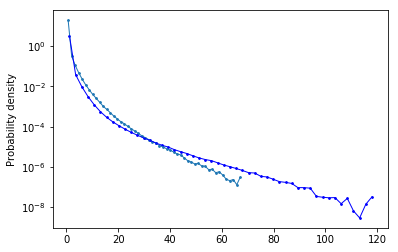

In [18]:
# Draw the plot
fig, ax = plt.subplots()
ax.scatter(total_bin_centers_cehgear, total_pdf_cehgear ,linewidth = 1,s=3)
ax.plot(total_bin_centers_cehgear, total_pdf_cehgear ,linewidth = 1)

ax.scatter(total_bin_centers, total_pdf ,linewidth = 1,s=3, color = 'blue')
ax.plot(total_bin_centers, total_pdf ,linewidth = 1, color = 'blue')

# ax.legend(handles=patches)
# ax.set_xlabel(precip_variable)
ax.set_ylabel('Probability density')
# ax.set_xlim(0,80)
# if xlim != False:
#     ax.set_xlim(0,xlim)
#plt.title(n_bins + " bins")
ax.set_yscale('log')
ax.set_xscale('linear')    
